In [1]:
#1.导入工具包
import pandas as pd
import numpy as np 

In [2]:
#2.导入数据集
train_df = pd.read_csv('house_price_data/train.csv',index_col=0)
test_df = pd.read_csv('house_price_data/test.csv',index_col=0)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
(train_df['SalePrice'] == 0).sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1191e8080>,
      dtype=object)

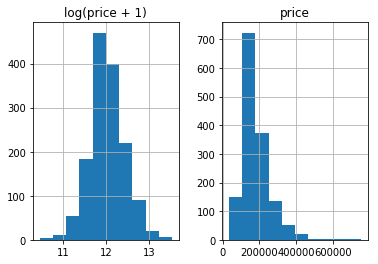

In [4]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

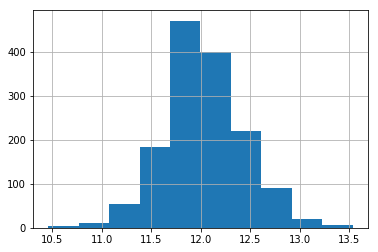

In [5]:
#训练集标签平滑化处理
y_train = np.log1p(train_df.pop('SalePrice'))
y_train.hist()

In [6]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape,train_df.shape,test_df.shape

((2919, 79), (1460, 79), (1459, 79))

In [7]:
#3.特征工程
#手动将连续值特征转离散特征
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [8]:
#离散特征做one-hot处理
all_df_dummy = pd.get_dummies(all_df)
all_df_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#数据缺失处理
all_df_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [10]:
mean_cols = all_df_dummy.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [11]:
all_df_dummy = all_df_dummy.fillna(mean_cols)
all_df_dummy.isnull().sum().sum()

0

In [12]:
#数值型数据标准化处理（非必须，回归器一般要做标准化）
all_df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [13]:
numeric_cols = all_df.columns[all_df.dtypes!='object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

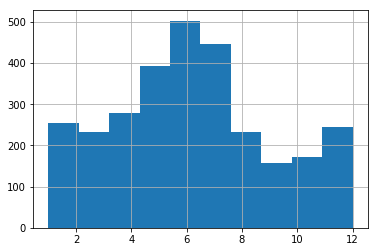

In [14]:
all_df_dummy['MoSold'].hist()

In [15]:
#手写标准化过程(也可以使用log)
numeric_cols_mean = all_df_dummy.loc[:,numeric_cols].mean()
numeric_cols_std = all_df_dummy.loc[:,numeric_cols].std()
all_df_dummy.loc[:,numeric_cols] = (all_df_dummy.loc[:,numeric_cols] - numeric_cols_mean) / numeric_cols_std

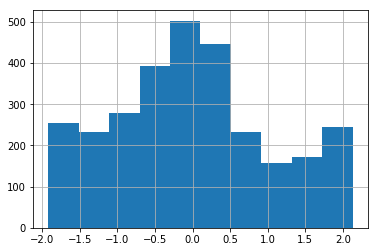

In [16]:
all_df_dummy['MoSold'].hist()

In [17]:
#4.建立模型
train_df_dummy = all_df_dummy.loc[train_df.index]
test_df_dummy = all_df_dummy.loc[test_df.index]
train_df_dummy.shape, test_df_dummy.shape

((1460, 303), (1459, 303))

In [18]:
#data frame转numpy array
X_train = train_df_dummy.values
X_test = test_df_dummy.values
X_train.shape, X_test.shape

((1460, 303), (1459, 303))

In [19]:
#4.1构建岭回归模型
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
#grid search调参
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    # cross validation 取平均测试误差
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alpha vs Cross Validation Error')

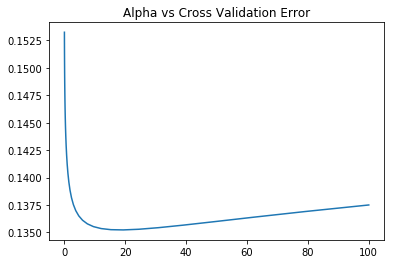

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(alphas,test_scores)
plt.title("Alpha vs Cross Validation Error")  #如图，alpha取15

In [21]:
#4.2构建随机森林模型
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)  #n_estimators表示决策树的数量
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'max_features vs Cross Validation Error')

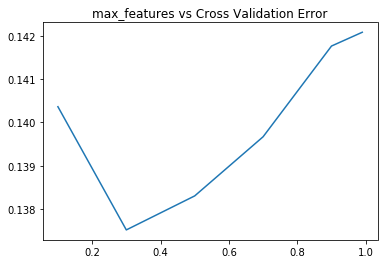

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(max_features,test_scores)
plt.title("max_features vs Cross Validation Error")  #如图，max_feature取0.3

In [23]:
# 5.模型集成
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
y_ridge = np.expm1(ridge.predict(X_test))  #训练集做过标签平滑
y_rf = np.expm1(rf.predict(X_test))

In [25]:
#回归问题采用平均法做集成
y_final = (y_ridge + y_rf) / 2

In [26]:
#6.提交结果（以df方式）
submission_df = pd.DataFrame(data= {'SalePrice': y_final},index = test_df.index)
submission_df.head(10)

,SalePrice
Id,
1461,119397.233335
1462,150347.166136
1463,174626.732660
1464,190015.324802
1465,195744.963349
1466,176240.519875
1467,177437.050508
1468,169037.000618
1469,184618.312179


In [27]:
#保存df
submission_df.to_csv("house_price_submission.csv")